### ASSIGNMENT 5 - CLUSTERING ###

### Objective
The objective of this assessment is to evaluate the understanding and application of clustering techniques on a real-world dataset.

### Dataset
The dataset used for this assignment is the **Iris dataset**, available in the `sklearn` library.


In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

**1. Loading and Preprocessing**

In [15]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:

df['species'] = iris.target


df_without_species = df.drop(columns=['species'])


print(df_without_species.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
print("Dataset Info:")
df_without_species.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
print("Statistical Summary:")
df_without_species.describe()

Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print("Null values in each column:")
print(df_without_species.isnull().sum())

Null values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [7]:
df_without_species.duplicated().sum()

np.int64(1)

In [8]:
df_without_species.shape

(150, 4)

In [9]:
df_without_species.drop_duplicates(inplace=True)

In [10]:
df_without_species.shape

(149, 4)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_without_species)
scaled_df = pd.DataFrame(data=scaled_data, columns=iris.feature_names)
print(scaled_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.898033          1.012401          -1.333255         -1.308624
1          -1.139562         -0.137353          -1.333255         -1.308624
2          -1.381091          0.322549          -1.390014         -1.308624
3          -1.501855          0.092598          -1.276496         -1.308624
4          -1.018798          1.242352          -1.333255         -1.308624


## 2. Clustering Algorithm Implementation

### A) KMeans Clustering

#### Description of KMeans Clustering
KMeans is a widely used clustering algorithm that partitions data into **K clusters** by minimizing intra-cluster variance. The algorithm follows these steps:

1. **Initialize Centroids**: Randomly select K initial cluster centroids.
2. **Assign Points to Clusters**: Assign each data point to the nearest centroid based on a distance metric (e.g., Euclidean distance).
3. **Update Centroids**: Recalculate the centroids as the mean of all points assigned to each cluster.
4. **Iterate**: Repeat steps 2 and 3 until the centroids stabilize (i.e., no further changes) or the maximum number of iterations is reached.

#### Suitability for the Iris Dataset
The Iris dataset contains three well-defined clusters that correspond to the three species: **Setosa**, **Versicolor**, and **Virginica**. KMeans clustering is particularly suitable for this dataset because:

- It is designed to partition data into compact clusters.
- The dataset's four numerical features (sepal length, sepal width, petal length, and petal width) provide a clear structure for clustering.
- KMeans efficiently identifies natural groupings in the data, making it an ideal choice for exploring the inherent structure of the Iris dataset.

#### Implementation
- Apply KMeans clustering to the preprocessed Iris dataset.
- Visualize the resulting clusters using scatter plots.

The clustering results will highlight how well the algorithm separates the data into meaningful groups.


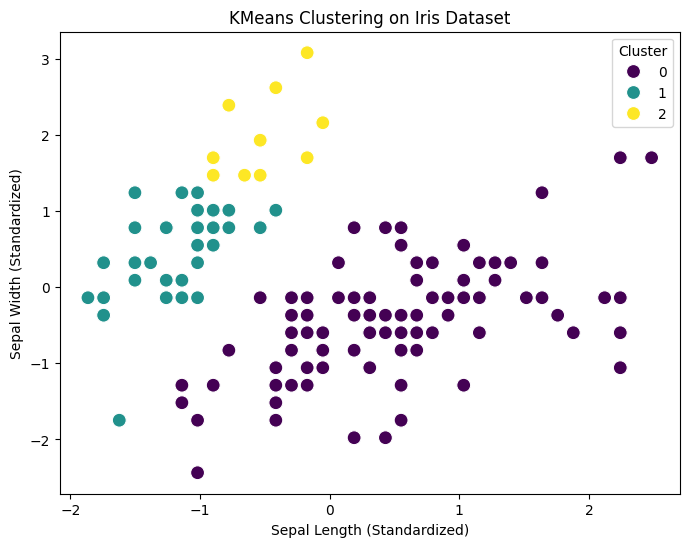

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_
scaled_df['cluster'] = cluster_labels
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_df.iloc[:, 0],  # sepal length
    y=scaled_df.iloc[:, 1],  # sepal width
    hue=scaled_df['cluster'],  # color by cluster
    palette='viridis',
    s=100
)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend(title='Cluster')
plt.show()

### B) Hierarchical Clustering

#### Description of Hierarchical Clustering
Hierarchical clustering is a clustering technique that builds a hierarchy of clusters through one of two approaches:
- **Agglomerative (Bottom-Up)**: Starts with each data point as its own cluster and merges clusters iteratively.
- **Divisive (Top-Down)**: Starts with all data points in a single cluster and splits them iteratively.

##### Steps of Agglomerative Hierarchical Clustering:
1. **Treat Each Data Point as a Cluster**: Initially, each data point is considered its own cluster.
2. **Compute Distances**: Calculate pairwise distances between clusters using a linkage criterion (e.g., single linkage, complete linkage, average linkage).
3. **Merge Clusters**: Merge the two closest clusters based on the chosen distance metric.
4. **Repeat**: Continue merging clusters until all points are combined into a single cluster or a stopping criterion is reached.

#### Suitability for the Iris Dataset
Hierarchical clustering is suitable for the Iris dataset because:
- It reveals **hierarchical relationships** among data points, which may naturally exist in the dataset.
- Unlike KMeans, it doesn’t require specifying the number of clusters upfront, allowing exploration of different groupings.
- The dendrogram provides a visual representation of the clustering hierarchy, making it easier to analyze the cluster structure and relationships among data points.

#### Implementation
- Apply agglomerative hierarchical clustering to the preprocessed Iris dataset.
- Visualize the clusters using dendrograms and scatter plots to analyze the results.

This method helps in identifying meaningful cluster structures and provides insights into the dataset's hierarchical nature.


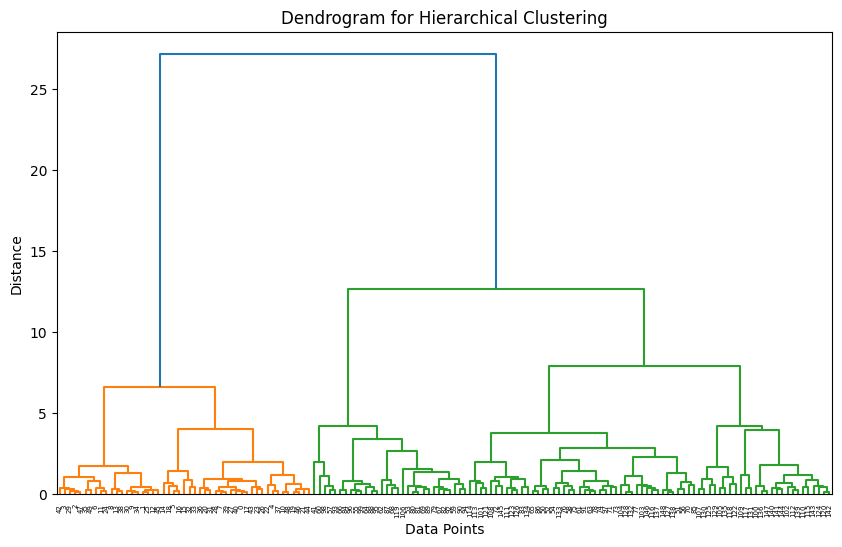

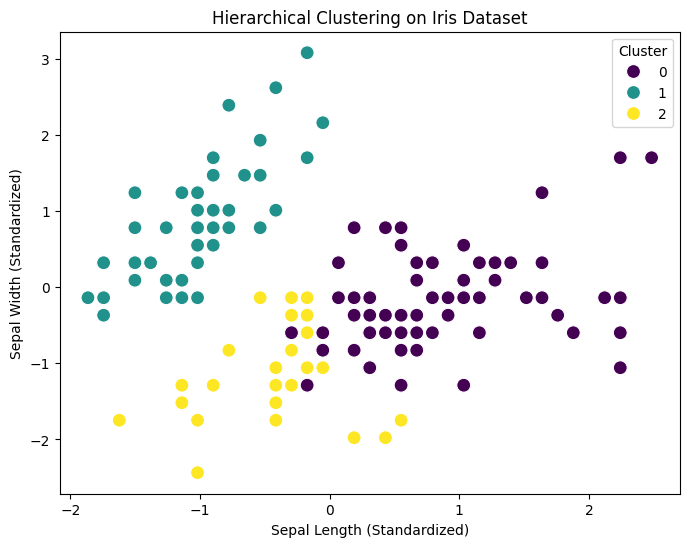

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
linkage_matrix = linkage(scaled_df.iloc[:, :-1], method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_df.iloc[:, :-1])
scaled_df['hierarchical_cluster'] = hierarchical_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_df.iloc[:, 0],  # sepal length
    y=scaled_df.iloc[:, 1],  # sepal width
    hue=scaled_df['hierarchical_cluster'],  # color by cluster
    palette='viridis',
    s=100
)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend(title='Cluster')
plt.show()

### Model Evaluation

In [14]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(scaled_df.iloc[:, :-2], cluster_labels)
print(f"Silhouette Score for KMeans Clustering: {kmeans_silhouette:.3f}")
hierarchical_silhouette = silhouette_score(scaled_df.iloc[:, :-2], hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.3f}")

Silhouette Score for KMeans Clustering: 0.494
Silhouette Score for Hierarchical Clustering: 0.450


***KMeans Clustering Silhouette Score: 0.494***

***Hierarchical Clustering Silhouette Score: 0.450***

### Interpretation

#### Silhouette Score Comparison
The silhouette score for **KMeans clustering** is slightly higher than that for **Hierarchical clustering**. A higher silhouette score indicates that clusters are more compact and well-separated, signifying better clustering quality.

#### Better Model
KMeans Clustering outperforms Hierarchical Clustering on the Iris dataset. Its clusters are better separated and internally consistent, leading to higher-quality results.

#### Possible Reasons
1. **KMeans Clustering**:
   - Performs well on datasets with a clear, spherical cluster structure, such as the Iris dataset with its well-defined groupings of species.

2. **Hierarchical Clustering**:
   - May struggle due to sensitivity to noise or the choice of distance metric and linkage method, which can impact the quality of the resulting clusters.
